# Расчетная сетка регрессоров

Регрессоры:
- плотность теплоносителя
- температура теплоносителя
- температуры топлива
- концентрация борной кислоты

In [1]:
import pandas as pd

Загрузка данных

In [2]:
df = pd.read_excel('Input/Data.xlsx')
df.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),3S_{tr1}(1),3S_{tr2}(2),\Sigma_{a1}(3),\Sigma_{a2}(4),nuS_{f1}(5),nuS_{f2}(6),\Sigma_{f1}(7),\Sigma_{f2}(8),\Sigma_{1->2}(9),k_{inf}(10),\sigma_{a2}^{Xe},\sigma_{a2}^{Sm}
0,0.7235,575.0,1027.0,600.0,0.661853,2.568298,0.009376,0.085584,0.006677,0.133250,0.002620,0.054750,0.017392,1.261041,1072970.0,35421.398
1,0.7750,448.0,1043.0,1500.0,0.679602,2.874687,0.009581,0.098339,0.006723,0.139256,0.002636,0.057218,0.018726,1.174265,1141000.0,36147.801
2,0.9125,370.5,1418.0,750.0,0.727336,3.668742,0.009908,0.102815,0.006844,0.153823,0.002681,0.063203,0.022463,1.249619,1308480.0,39214.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   \rho(g/cm^3)      257 non-null    float64
 1   T_c(K)            257 non-null    float64
 2   T_f(K)            257 non-null    float64
 3   c_b(ppm)          257 non-null    float64
 4   3S_{tr1}(1)       257 non-null    float64
 5   3S_{tr2}(2)       257 non-null    float64
 6   \Sigma_{a1}(3)    257 non-null    float64
 7   \Sigma_{a2}(4)    257 non-null    float64
 8   nuS_{f1}(5)       257 non-null    float64
 9   nuS_{f2}(6)       257 non-null    float64
 10  \Sigma_{f1}(7)    257 non-null    float64
 11  \Sigma_{f2}(8)    257 non-null    float64
 12  \Sigma_{1->2}(9)  257 non-null    float64
 13  k_{inf}(10)       257 non-null    float64
 14  \sigma_{a2}^{Xe}  257 non-null    float64
 15  \sigma_{a2}^{Sm}  257 non-null    float64
dtypes: float64(16)
memory usage: 32.2 KB


Проверка пропусков

In [4]:
df.isnull().sum()

\rho(g/cm^3)        0
T_c(K)              0
T_f(K)              0
c_b(ppm)            0
3S_{tr1}(1)         0
3S_{tr2}(2)         0
\Sigma_{a1}(3)      0
\Sigma_{a2}(4)      0
nuS_{f1}(5)         0
nuS_{f2}(6)         0
\Sigma_{f1}(7)      0
\Sigma_{f2}(8)      0
\Sigma_{1->2}(9)    0
k_{inf}(10)         0
\sigma_{a2}^{Xe}    0
\sigma_{a2}^{Sm}    0
dtype: int64

Нормализация признаков

In [5]:
features = list(df)[:4]
print(features)

['\\rho(g/cm^3)', 'T_c(K)', 'T_f(K)', 'c_b(ppm)']


In [6]:
df[features].describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
count,257.000000,257.000000,257.000000,257.000000
mean,0.773742,448.491808,1043.838306,1493.967349
std,0.158780,89.316810,430.718000,863.720860
min,0.502148,294.210910,298.859410,11.718750
25%,0.637500,371.710910,673.859380,750.000000
50%,0.772852,448.000000,1043.000000,1488.281000
75%,0.910352,525.500000,1412.141000,2238.281000
max,1.047852,601.789120,1787.141000,2988.281000


In [7]:
df_features_norm = df

for i in range(len(features)):
    df_features_norm[features[i]] = (df[features[i]]-df[features[i]].mean())/df[features[i]].std()

In [8]:
df_features_norm.describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),3S_{tr1}(1),3S_{tr2}(2),\Sigma_{a1}(3),\Sigma_{a2}(4),nuS_{f1}(5),nuS_{f2}(6),\Sigma_{f1}(7),\Sigma_{f2}(8),\Sigma_{1->2}(9),k_{inf}(10),\sigma_{a2}^{Xe},\sigma_{a2}^{Sm}
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,2.570000e+02,257.000000
mean,-8.778970e-15,6.946056e-15,-4.427932e-16,-4.556666e-15,0.679230,2.879487,0.009514,0.097856,0.006698,0.138663,0.002627,0.056974,0.018717,1.177139,1.124386e+06,35423.659751
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.053920,0.790229,0.000402,0.011233,0.000158,0.009800,0.000058,0.004026,0.004395,0.086005,1.195160e+05,2841.132233
min,-1.710507e+00,-1.727344e+00,-1.729621e+00,-1.716120e+00,0.586982,1.505131,0.008622,0.076091,0.006372,0.117360,0.002506,0.048221,0.011126,1.005264,8.587990e+05,29207.199000
25%,-8.580575e-01,-8.596467e-01,-8.589818e-01,-8.613516e-01,0.631098,2.204620,0.009225,0.089572,0.006571,0.131596,0.002581,0.054070,0.014993,1.106373,1.034060e+06,33246.301000
50%,-5.608782e-03,-5.506328e-03,-1.946298e-03,-6.583549e-03,0.678348,2.874687,0.009518,0.097073,0.006716,0.138722,0.002634,0.056998,0.018734,1.172133,1.124950e+06,35566.801000
75%,8.603710e-01,8.621915e-01,8.550901e-01,8.617525e-01,0.725984,3.566347,0.009804,0.105296,0.006834,0.144896,0.002677,0.059535,0.022463,1.245992,1.204050e+06,37580.500000
max,1.726354e+00,1.716332e+00,1.725729e+00,1.730089e+00,0.774060,4.406140,0.010476,0.130769,0.006941,0.165624,0.002716,0.068052,0.026528,1.384922,1.427190e+06,41929.301000


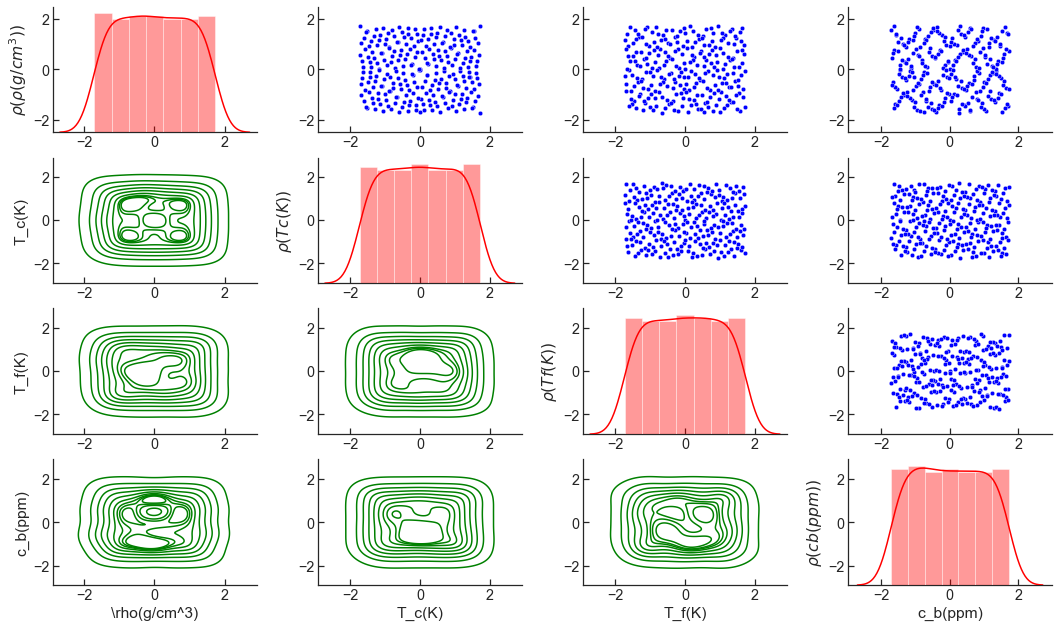

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
sns.set(font_scale = 1.3,
       style='white',
       )


g = sns.PairGrid(df_features_norm[features])

g.map_diag(sns.distplot, color="red")
g.map_lower(sns.kdeplot, color="green")
g.map_upper(sns.scatterplot, s = 20, color="blue")
g.fig.set_size_inches(16, 9)

# Подписи к осям y
g.axes[0,0].yaxis.set_label_text(r'$\rho (\rho (g/cm^3)) $')
g.axes[1,1].yaxis.set_label_text(r'$\rho (Tc (K)) $')
g.axes[2,2].yaxis.set_label_text(r'$\rho (Tf (K)) $')
g.axes[3,3].yaxis.set_label_text(r'$\rho (cb (ppm)) $')

# Тики видны на x
g.axes[0,0].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,1].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,0].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[0,1].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

g.axes[0,2].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,2].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,2].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,1].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,0].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

g.axes[0,3].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,3].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,3].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,3].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,2].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,1].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,0].xaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

# Тики видны на y
g.axes[0,0].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,1].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,0].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[0,1].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

g.axes[0,2].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,2].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,2].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,1].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,0].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

g.axes[0,3].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[1,3].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[2,3].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,3].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,2].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,1].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')
g.axes[3,0].yaxis.set_tick_params(labelleft=True, bottom = True, direction = 'in')

#Лимиты тиков на y
g.axes[0,0].set_ylim(-2.5, 2.5)
g.axes[0,1].set_ylim(-2.5, 2.5)
g.axes[0,2].set_ylim(-2.5, 2.5)
g.axes[0,3].set_ylim(-2.5, 2.5)

plt.subplots_adjust(hspace=0.2, wspace=0.3)
g.savefig("Output/dist_1.png")

# Диаграммы рассеяния

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
feature_names = list(df)[:4]
feature_names

In [ ]:
target_f_names = list(df)[4:]
target_f_names

In [ ]:
def My_plot(name_y, ord_1, ord_2, ord_3, ord_4):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)

    fig.set_figwidth(15)
    ax1.set(xlim=(-2, 2))
    ax2.set(xlim=(-2, 2))
    ax3.set(xlim=(-2, 2))
    ax4.set(xlim=(-2, 2))

    sns.regplot(x=df['\\rho(g/cm^3)'],
                 y=name_y,
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = ord_1, ax = ax1)
    sns.regplot(x=df['T_c(K)'],
                 y=name_y,
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = ord_2,  ax = ax2)
    sns.regplot(x=df['T_f(K)'],
                 y=name_y,
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = ord_3,  ax = ax3)
    sns.regplot(x=df['c_b(ppm)'],
                 y=name_y,
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"},  order = ord_4, ax = ax4)
    plt.show()

In [ ]:
My_plot('3S_{tr1}(1)', 1, 2, 1, 1)

In [ ]:
My_plot('3S_{tr2}(2)', 1, 1, 1, 1)

In [ ]:
My_plot('\\Sigma_{a1}(3)', 1, 1, 1, 1)

In [ ]:
My_plot('\\Sigma_{a2}(4)', 2, 3, 1, 1)

In [ ]:
My_plot('nuS_{f1}(5)', 2, 1, 1, 1)

In [ ]:
My_plot('nuS_{f2}(6)', 2, 2, 1, 1)

In [ ]:
My_plot('\\Sigma_{f1}(7)', 2, 1, 1, 1)

In [ ]:
My_plot('\\Sigma_{f2}(8)', 2, 1, 1, 1)

In [ ]:
My_plot('\\Sigma_{1->2}(9)', 1, 1, 1, 1)

In [ ]:
My_plot('k_{inf}(10)', 2, 1, 1, 2)

In [ ]:
My_plot('\\sigma_{a2}^{Xe}', 2, 1, 1, 2)

In [ ]:
My_plot('\\sigma_{a2}^{Sm}', 2, 1, 1, 2)